# Mini Project

## Main source code (Data Collection and EDA)

#### Import all the important libraries and models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


### Data collecting and Basic information

First we import the dataset from Kaggle

In [2]:
obese = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
obese

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


**Basic description of the variables**

General variables:
- **Gender**: Biological gender, Male or Female
- **Age**: Age of the observation
- **Height**: Height of the observation (in m)
- **Weight**: Weight of the observation (in kg)
  
The attributes related with eating habits are:
- **FAVC**: Frequent consumption of high caloric food
- **FCVC**: Frequency of consumption of vegetables
- **NCP**: Number of main meals
- **CAEC**: Consumption of food between meals
- **SMOKE**: Habit of smoking (smoke or not)
- **CH20**: Consumption of water daily
- **CALC**: Consumption of alcohol
  
The attributes related with the physical condition are:
- **SCC**: Calories consumption monitoring
- **FAF**: Physical activity frequency
- **TUE**: Time using technology devices
- **MTRANS**: Transportation used

**Number of Non-null observations and dtypes for each variable**

In [4]:
obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
obese.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


### Data preparation and cleaning

In [6]:
categorical_features = obese.select_dtypes(include=['object']).columns.tolist()
numeric_features = obese.select_dtypes(include=['number']).columns.tolist()

In [7]:
obese[categorical_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [8]:
obese[numeric_features].nunique()


id        20758
Age        1703
Height     1833
Weight     1979
FCVC        934
NCP         689
CH2O       1506
FAF        1360
TUE        1297
dtype: int64

All the numeric features, have enough distinct values to confirm their are continuous ones



In [9]:
missing_train = obese.isnull().sum()
missing_test = test_data.isnull().sum()

missing_train, missing_test

(id                                0
 Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0
 SMOKE                             0
 CH2O                              0
 SCC                               0
 FAF                               0
 TUE                               0
 CALC                              0
 MTRANS                            0
 NObeyesdad                        0
 dtype: int64,
 id                                0
 Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                   

In [10]:
obese = obese.drop_duplicates()

obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [11]:
obese.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def encode_columns(df):
    label_encoders = {}
    for column in ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    df = pd.get_dummies(df, columns=['CAEC', 'CALC', 'MTRANS'])
    return df, label_encoders

train_encoded, le_train = encode_columns(obese.copy())
test_encoded, le_test = encode_columns(test_data.copy())

train_encoded


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,...,False,False,False,False,True,True,False,False,False,False
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,...,True,False,False,False,True,False,False,False,True,False
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,...,True,False,False,True,False,False,False,False,True,False
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,0,...,True,False,False,True,False,False,False,False,True,False
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,0,...,False,False,False,True,False,False,False,False,True,False
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,0,...,True,False,False,False,True,False,False,False,True,False
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,0,...,True,False,False,False,True,True,False,False,False,False


In [13]:
X = train_encoded.drop(['id', 'NObeyesdad'], axis=1)
y = train_encoded['NObeyesdad']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((16606, 25), (4152, 25), (16606,), (4152,))

### Exploratory Data Analysis

#### **Exploration the number of Obesity levels and number of observations in each levels in NObeyesDad**

Number of levels : 7 

Number of observation in each level:
NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


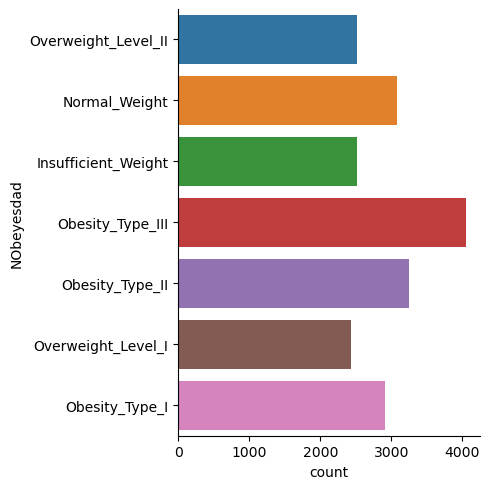

In [14]:
print("Number of levels :", len(obese["NObeyesdad"].unique()),'\n')
print("Number of observation in each level:")
print(obese["NObeyesdad"].value_counts())
sb.catplot(y = "NObeyesdad", data = obese, kind = "count")

We see that the amount of observations in each level is somewhat similar to each other, with only Obesity type 3 has significantly more observations. Which means this variable is somewhat balanced already, and our models later will face less problems.

#### **Exploration of other variables**

_**Categorical Variables**_

In [15]:
def explore_cat(var,df):
    print("Number of levels :", len(df[var].unique()),'\n')
    print("Number of observation in each level:")
    print(df[var].value_counts())
    sb.catplot(y = var, data = df, kind = "count")
    plt.show()
    print("\n")

Number of levels : 2 

Number of observation in each level:
Gender
0    10422
1    10336
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


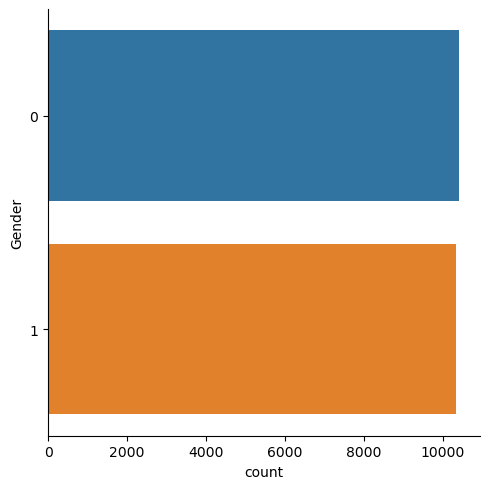

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Number of levels : 2 

Number of observation in each level:
family_history_with_overweight
1    17014
0     3744
Name: count, dtype: int64


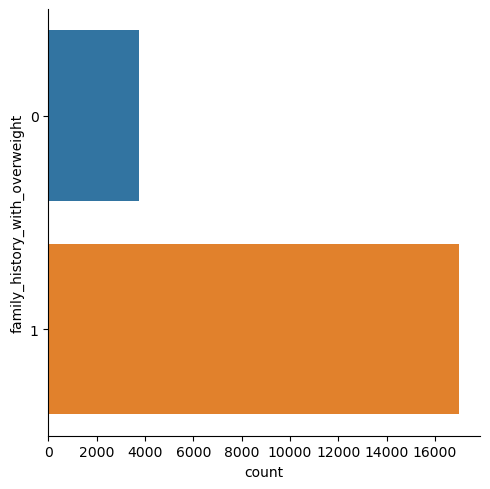



Number of levels : 2 

Number of observation in each level:
FAVC
1    18982
0     1776
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


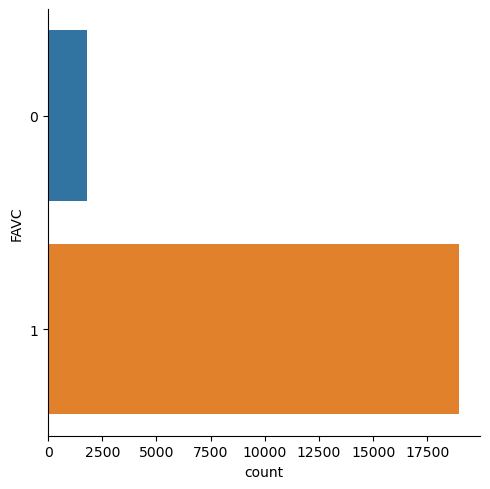



Number of levels : 2 

Number of observation in each level:
SMOKE
0    20513
1      245
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


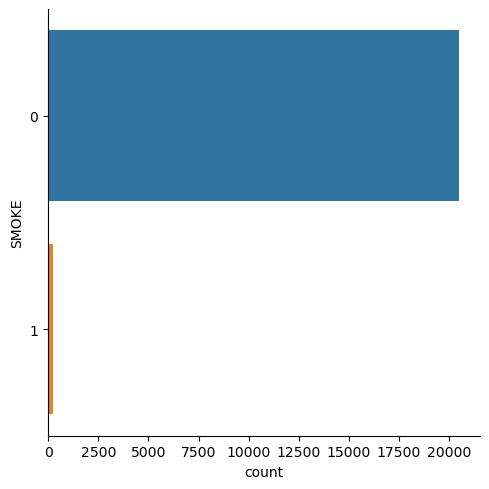



Number of levels : 2 

Number of observation in each level:
SCC
0    20071
1      687
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


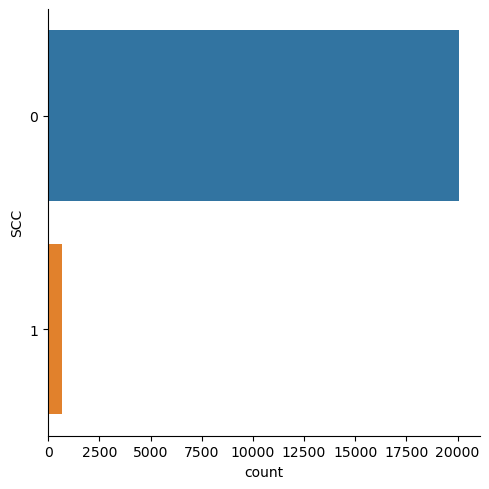



Number of levels : 2 

Number of observation in each level:
CAEC_Always
False    20280
True       478
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


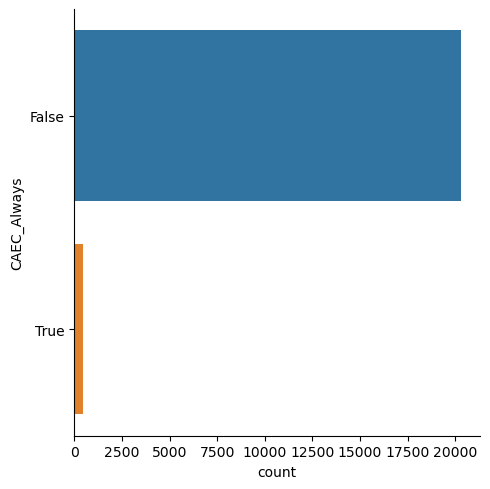

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Number of levels : 2 

Number of observation in each level:
CAEC_Frequently
False    18286
True      2472
Name: count, dtype: int64


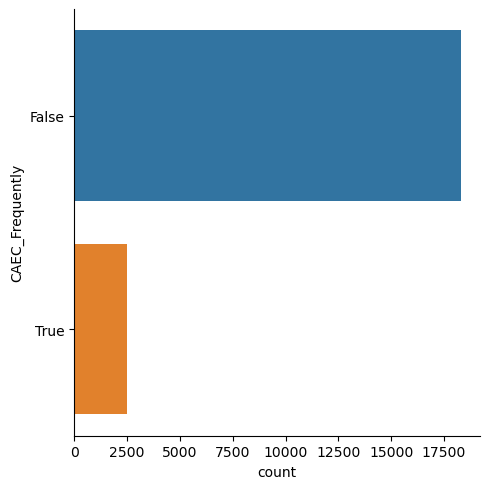



Number of levels : 2 

Number of observation in each level:
CAEC_Sometimes
True     17529
False     3229
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


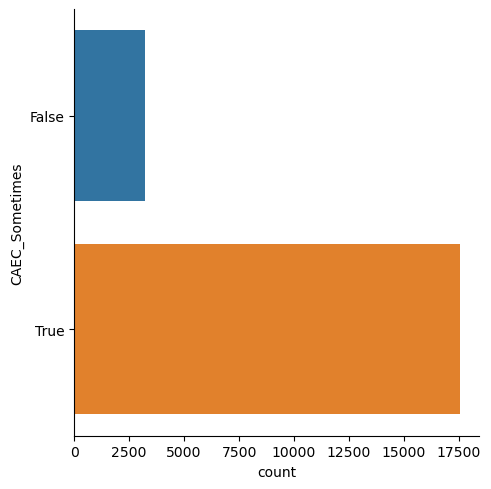



Number of levels : 2 

Number of observation in each level:
CAEC_no
False    20479
True       279
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


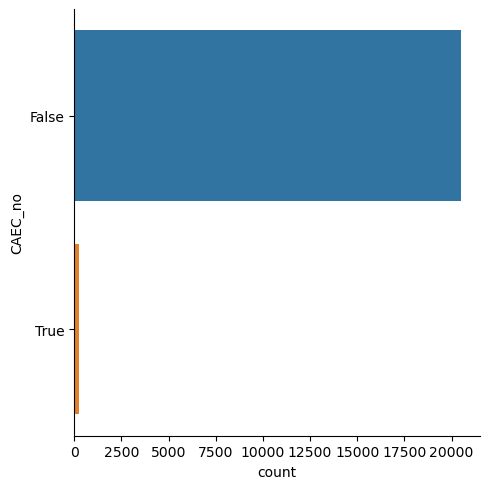

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Number of levels : 2 

Number of observation in each level:
CALC_Frequently
False    20229
True       529
Name: count, dtype: int64


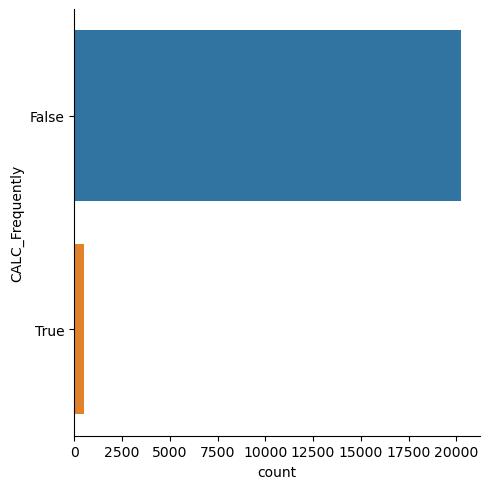



Number of levels : 2 

Number of observation in each level:
CALC_Sometimes
True     15066
False     5692
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


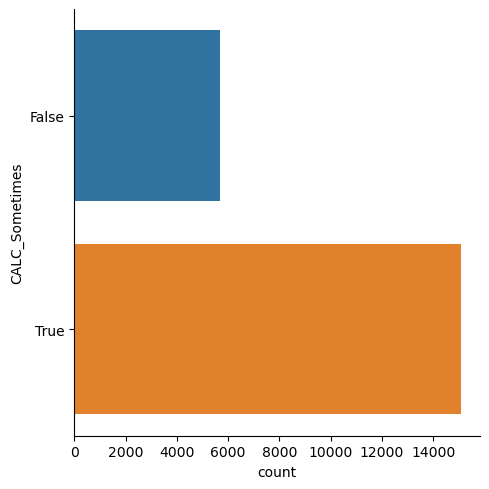



Number of levels : 2 

Number of observation in each level:
CALC_no
False    15595
True      5163
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


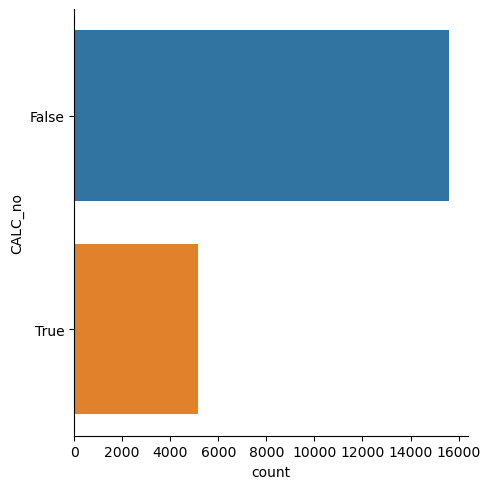



Number of levels : 2 

Number of observation in each level:
MTRANS_Automobile
False    17224
True      3534
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


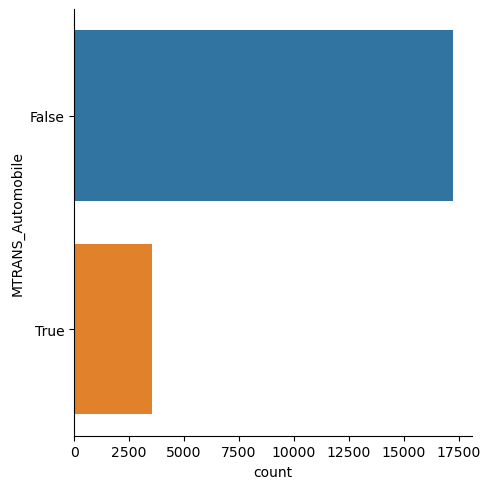



Number of levels : 2 

Number of observation in each level:
MTRANS_Bike
False    20726
True        32
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


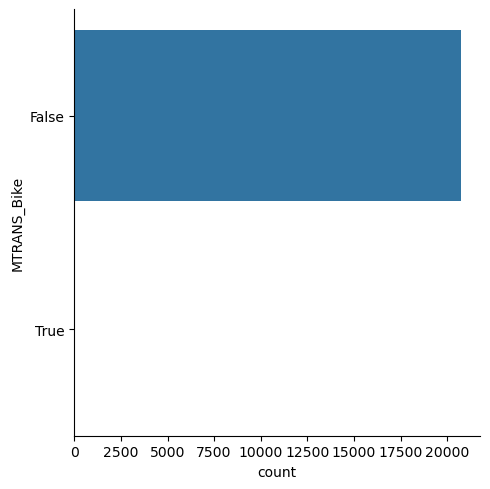

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Number of levels : 2 

Number of observation in each level:
MTRANS_Motorbike
False    20720
True        38
Name: count, dtype: int64


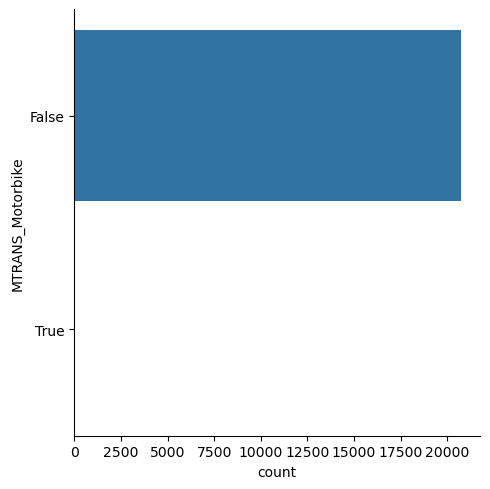

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Number of levels : 2 

Number of observation in each level:
MTRANS_Public_Transportation
True     16687
False     4071
Name: count, dtype: int64


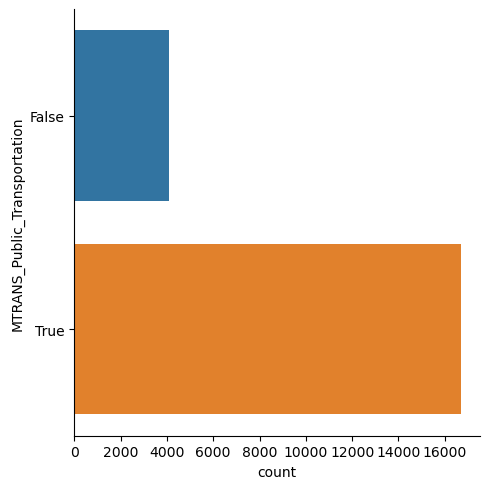



Number of levels : 2 

Number of observation in each level:
MTRANS_Walking
False    20291
True       467
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


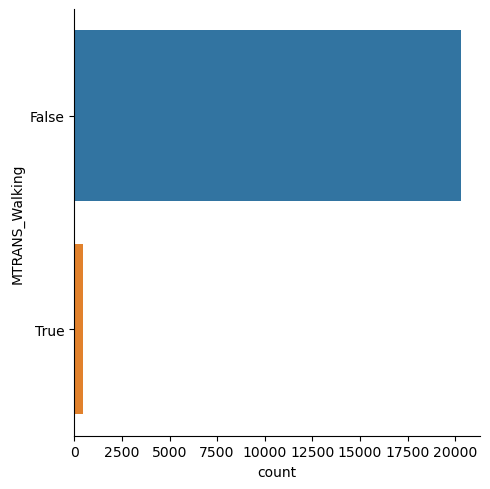

In [16]:
for var in train_encoded:
    if var not in numeric_features:
        if var != "NObeyesdad":
            explore_cat(var,train_encoded)

We can see that the distribution of Gender across 2 classes: Female and Male is very balanced. The ratio between the two is 10422:10336, or 1.008:1

However, this is the only variable out of the 8 other categorical variables (NObeyesdad excluded) that have a balanced distribution. All the other variables have extremely imbalanced distribution. 

To look at the relationship between these categorical variables and our target varible: NObeyesdad, we will use the **Contigency Table** as follows:

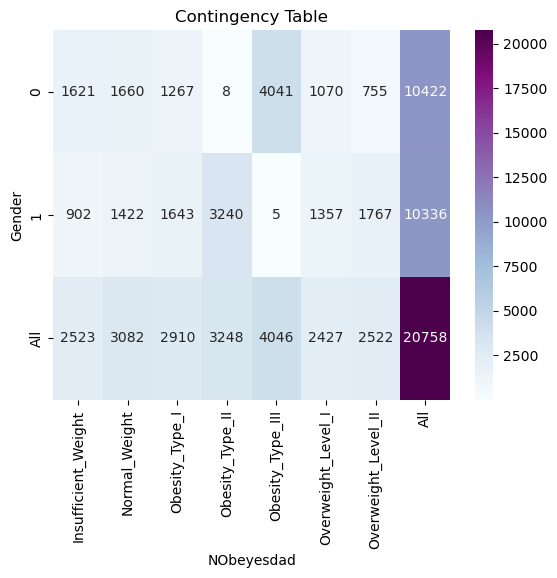

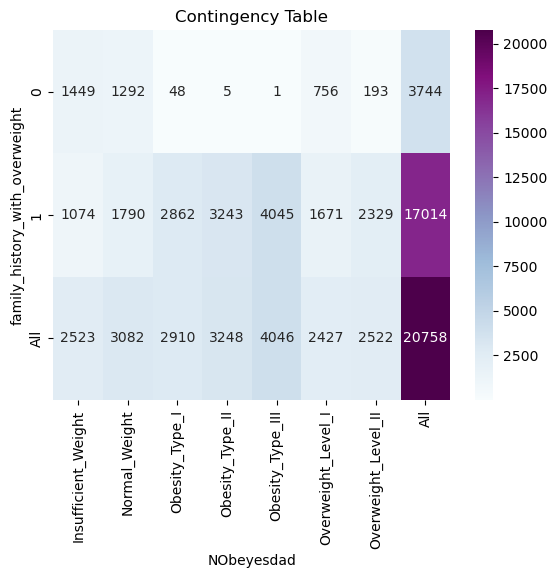

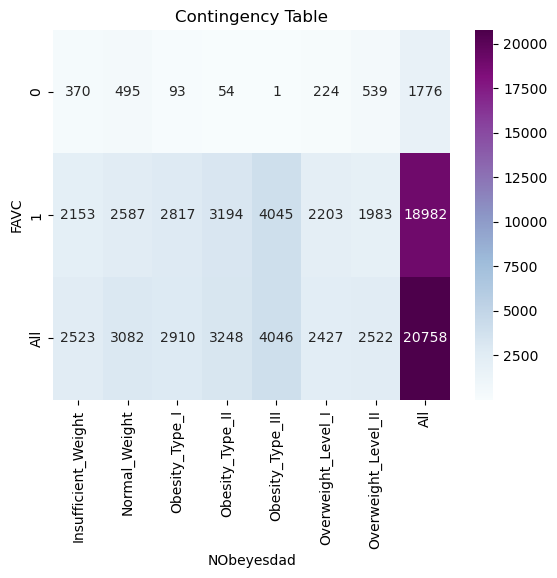

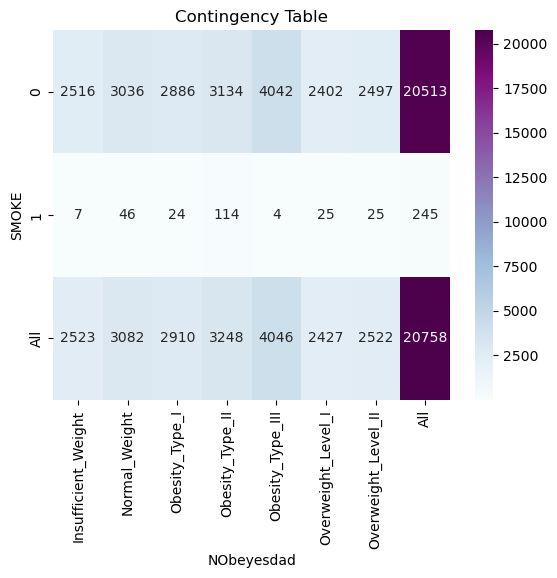

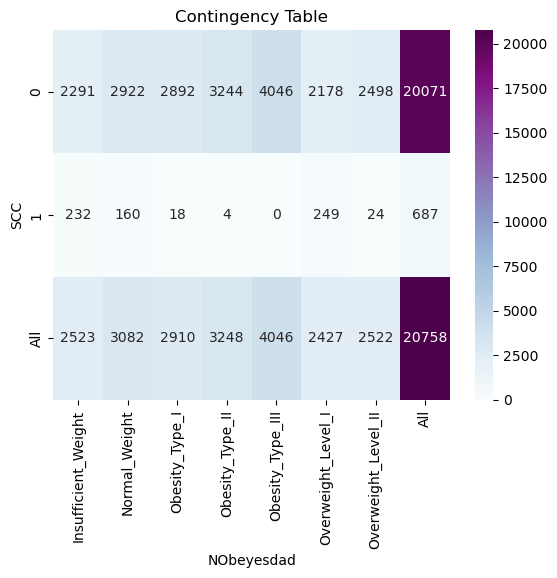

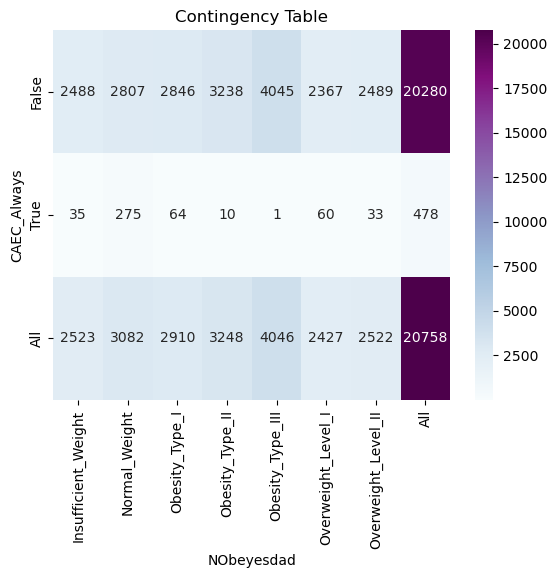

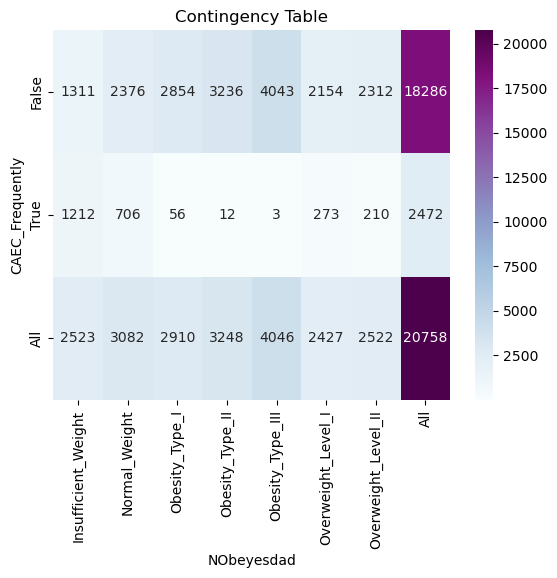

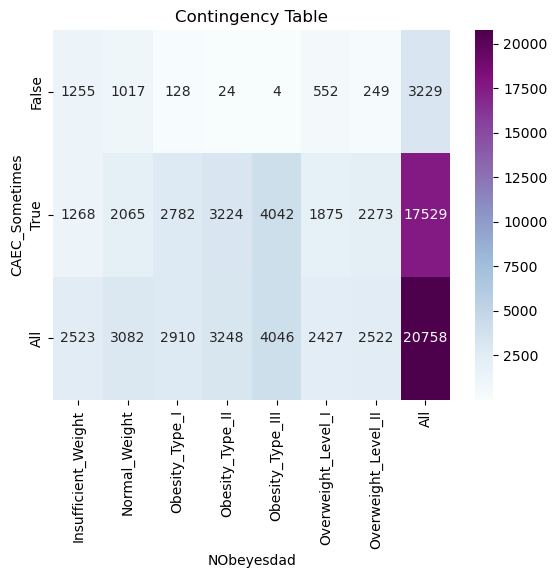

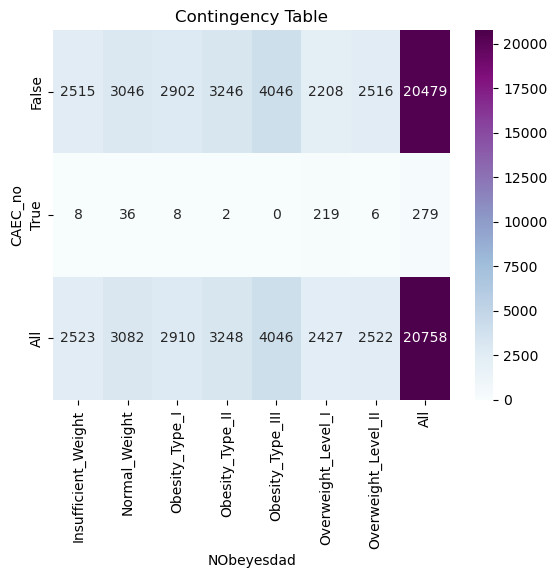

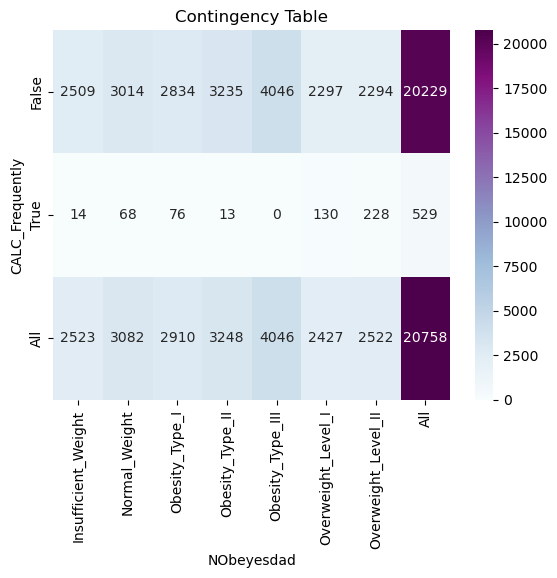

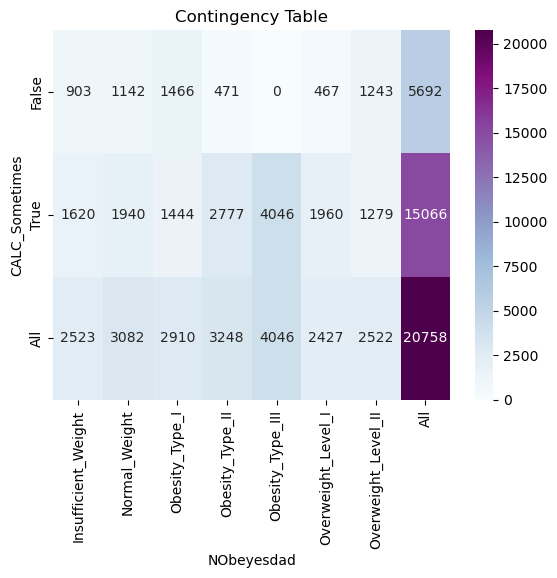

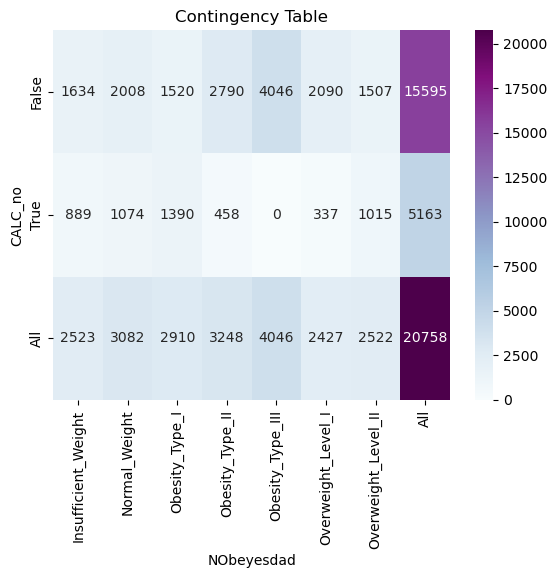

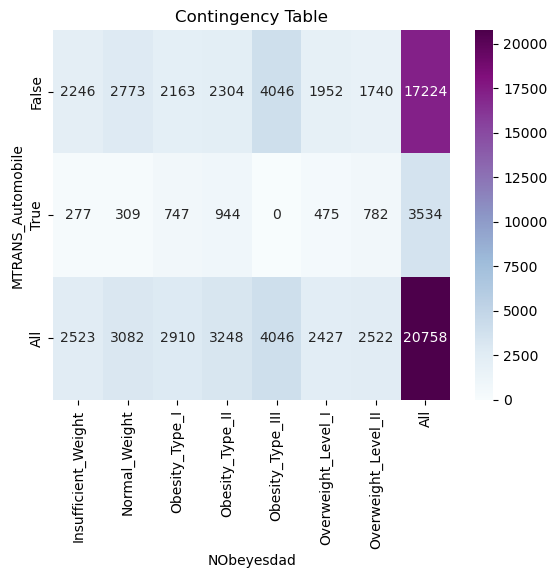

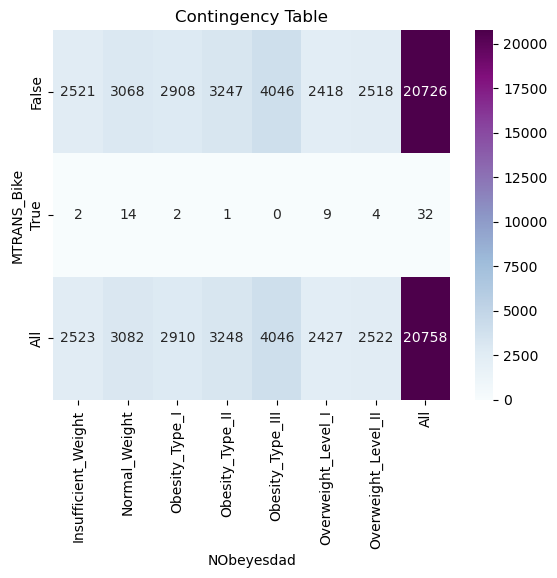

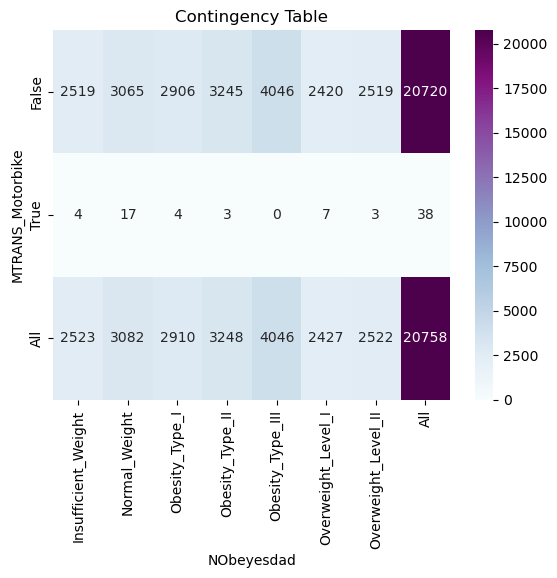

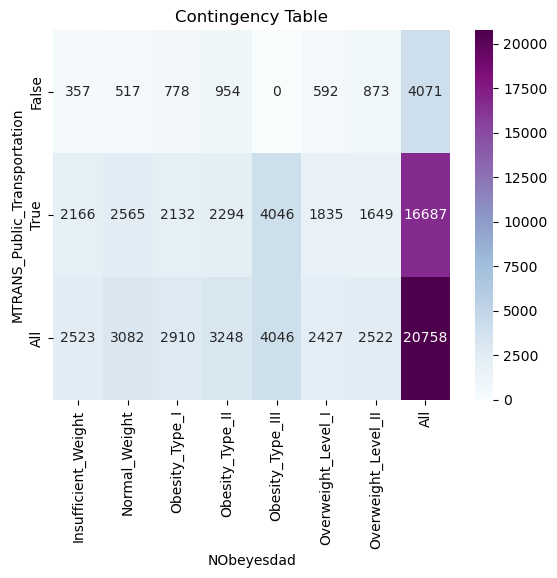

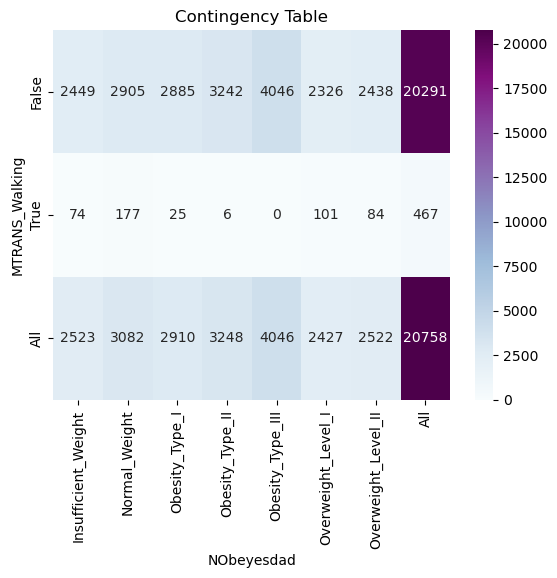

In [17]:
def contingency(var1, var2, dataframe):
    data_crosstab = pd.crosstab(dataframe[var1], dataframe[var2], margins=True)
    sb.heatmap(data_crosstab, annot=True, cmap="BuPu", fmt='d')
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.title("Contingency Table")
    plt.show()

for var in train_encoded:
    if var not in numeric_features:
        if var != "NObeyesdad":
            contingency(var,"NObeyesdad",train_encoded)

Now, we will use the **Chi-squared test** and measure the **Mutual Information** between each of the categorical variables to NObeyesdad, to see which categorical variable will be best to predict the level of Obesity: Nobeyesdad

In [18]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
def chi_square_test(var1, var2, dataframe):
    contingency_table = pd.crosstab(dataframe[var1], dataframe[var2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p


def mutual_information(var1, var2, dataframe):
    label_encoder = LabelEncoder()
    encoded_var1 = label_encoder.fit_transform(dataframe[var1])
    mi = mutual_info_classif(encoded_var1.reshape(-1, 1), dataframe[var2])
    return mi[0]

for var in train_encoded:
    if var not in numeric_features:
        if var != "NObeyesdad":
            p_value = chi_square_test(var, "NObeyesdad", train_encoded)
            mi = mutual_information(var, "NObeyesdad", train_encoded)
            print("The mutual information between",var,"and NObeyesdad is:",mi)
            print("The p_value of the chi-squared test is: ",p_value,"\n")

The mutual information between Gender and NObeyesdad is: 0.2621358825824842
The p_value of the chi-squared test is:  0.0 

The mutual information between family_history_with_overweight and NObeyesdad is: 0.1722442342309609
The p_value of the chi-squared test is:  0.0 

The mutual information between FAVC and NObeyesdad is: 0.045989286517785555
The p_value of the chi-squared test is:  0.0 

The mutual information between SMOKE and NObeyesdad is: 0.00948032370825036
The p_value of the chi-squared test is:  6.396981747148517e-44 

The mutual information between SCC and NObeyesdad is: 0.020220347153701468
The p_value of the chi-squared test is:  3.870102954479357e-218 

The mutual information between CAEC_Always and NObeyesdad is: 0.022171352556248802
The p_value of the chi-squared test is:  1.6445652144984362e-163 

The mutual information between CAEC_Frequently and NObeyesdad is: 0.09774378698642217
The p_value of the chi-squared test is:  0.0 

The mutual information between CAEC_Someti

All the p_value of the chi-squared test is close to 0, which indicate that the Obesity level (NObeyesdad) is indeed dependent on all of these variables.

Considering which variable is best to predict NObeyesdad, we must look at the mutual information between the categorical variables and NObeyesdad. According to the mutual information index, Gender, family_history_with_overweight, CAEC and CALC are best predictors for NObeyesdad

_**Numerical Variable**_

Statistical Summary of some variables

In [19]:
obese.describe().round(2)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00
mean,10378.50,23.84,1.70,87.89,2.45,2.76,2.03,0.98,0.62
std,5992.46,5.69,0.09,26.38,0.53,0.71,0.61,0.84,0.60
min,0.00,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,5189.25,20.00,1.63,66.00,2.00,3.00,1.79,0.01,0.00
50%,10378.50,22.82,1.70,84.06,2.39,3.00,2.00,1.00,0.57
75%,15567.75,26.00,1.76,111.60,3.00,3.00,2.55,1.59,1.00
max,20757.00,61.00,1.98,165.06,3.00,4.00,3.00,3.00,2.00


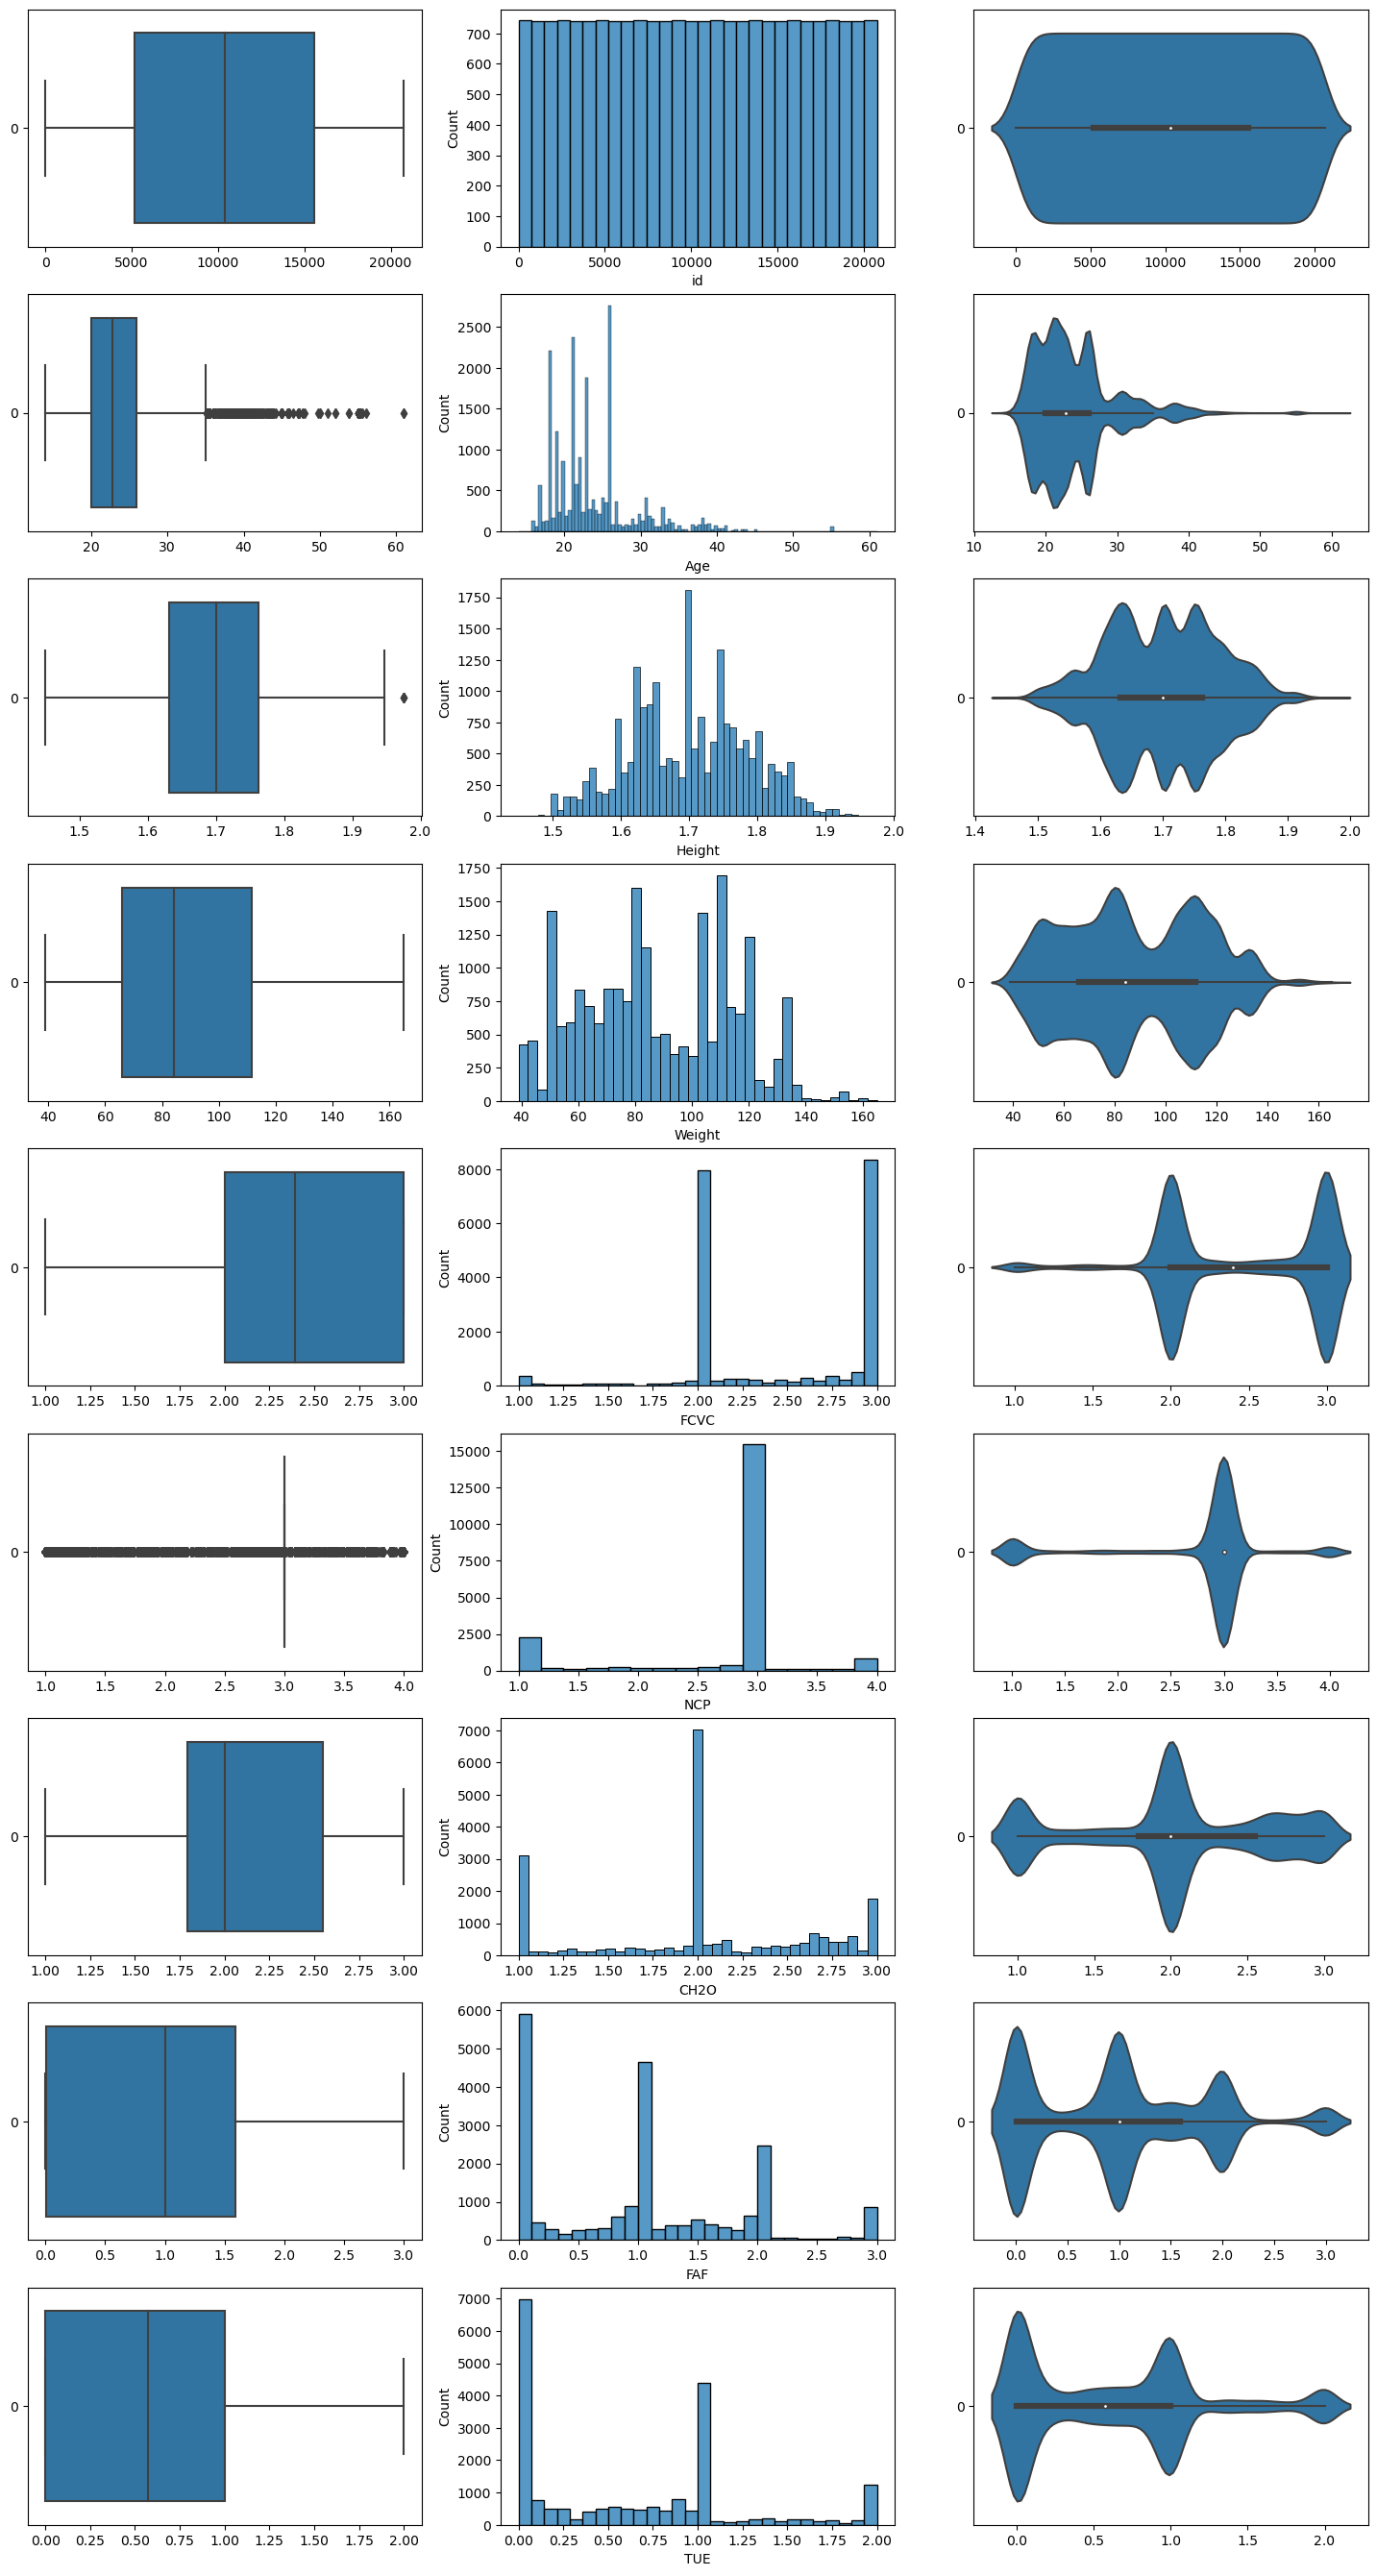

In [20]:
f, axes = plt.subplots(9, 3, figsize=(18, 34))

count = 0
for var in obese:
    if obese[var].dtype=="float64" or obese[var].dtype=="int64":
        sb.boxplot(data = obese[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = obese[var], ax = axes[count,1])
        sb.violinplot(data = obese[var], orient = "h", ax = axes[count,2])
        count += 1

Out of the numerical variables, only Height and Weight have a slightly normal distribution. Age has a very right-skewed distribution. Other variables' distribution appear almost discrete, where 3 or 4 values have substantially more observations than others.

Correlation betweens different numerical variables

In [21]:
jointDF = obese.select_dtypes(include="number")
jointDF.corr()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
id,1.000000,0.007634,0.012041,0.014020,0.002098,-0.000332,0.007917,0.016719,0.007667
Age,0.007634,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,0.012041,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.014020,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.002098,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.000332,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,0.007917,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,0.016719,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,0.007667,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


<Axes: >

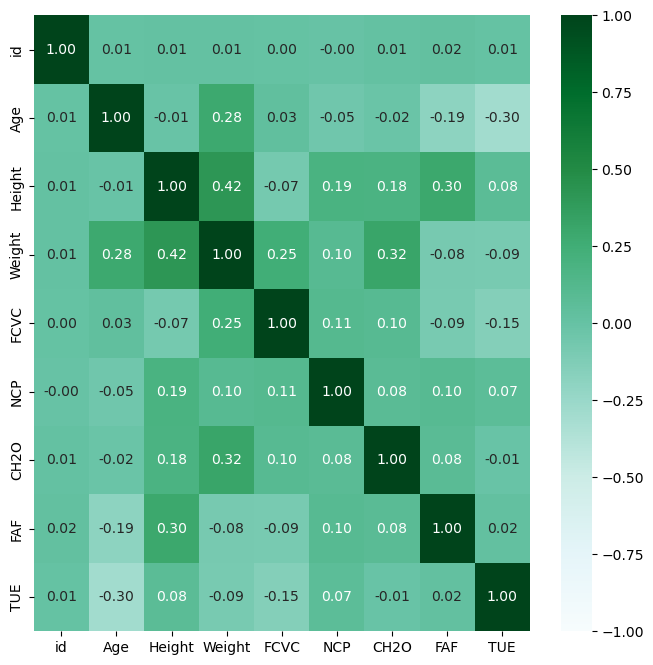

In [22]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",cmap="BuGn")

We now use boxplot graphs to determine which variable might be the best to predict NObeyesdad

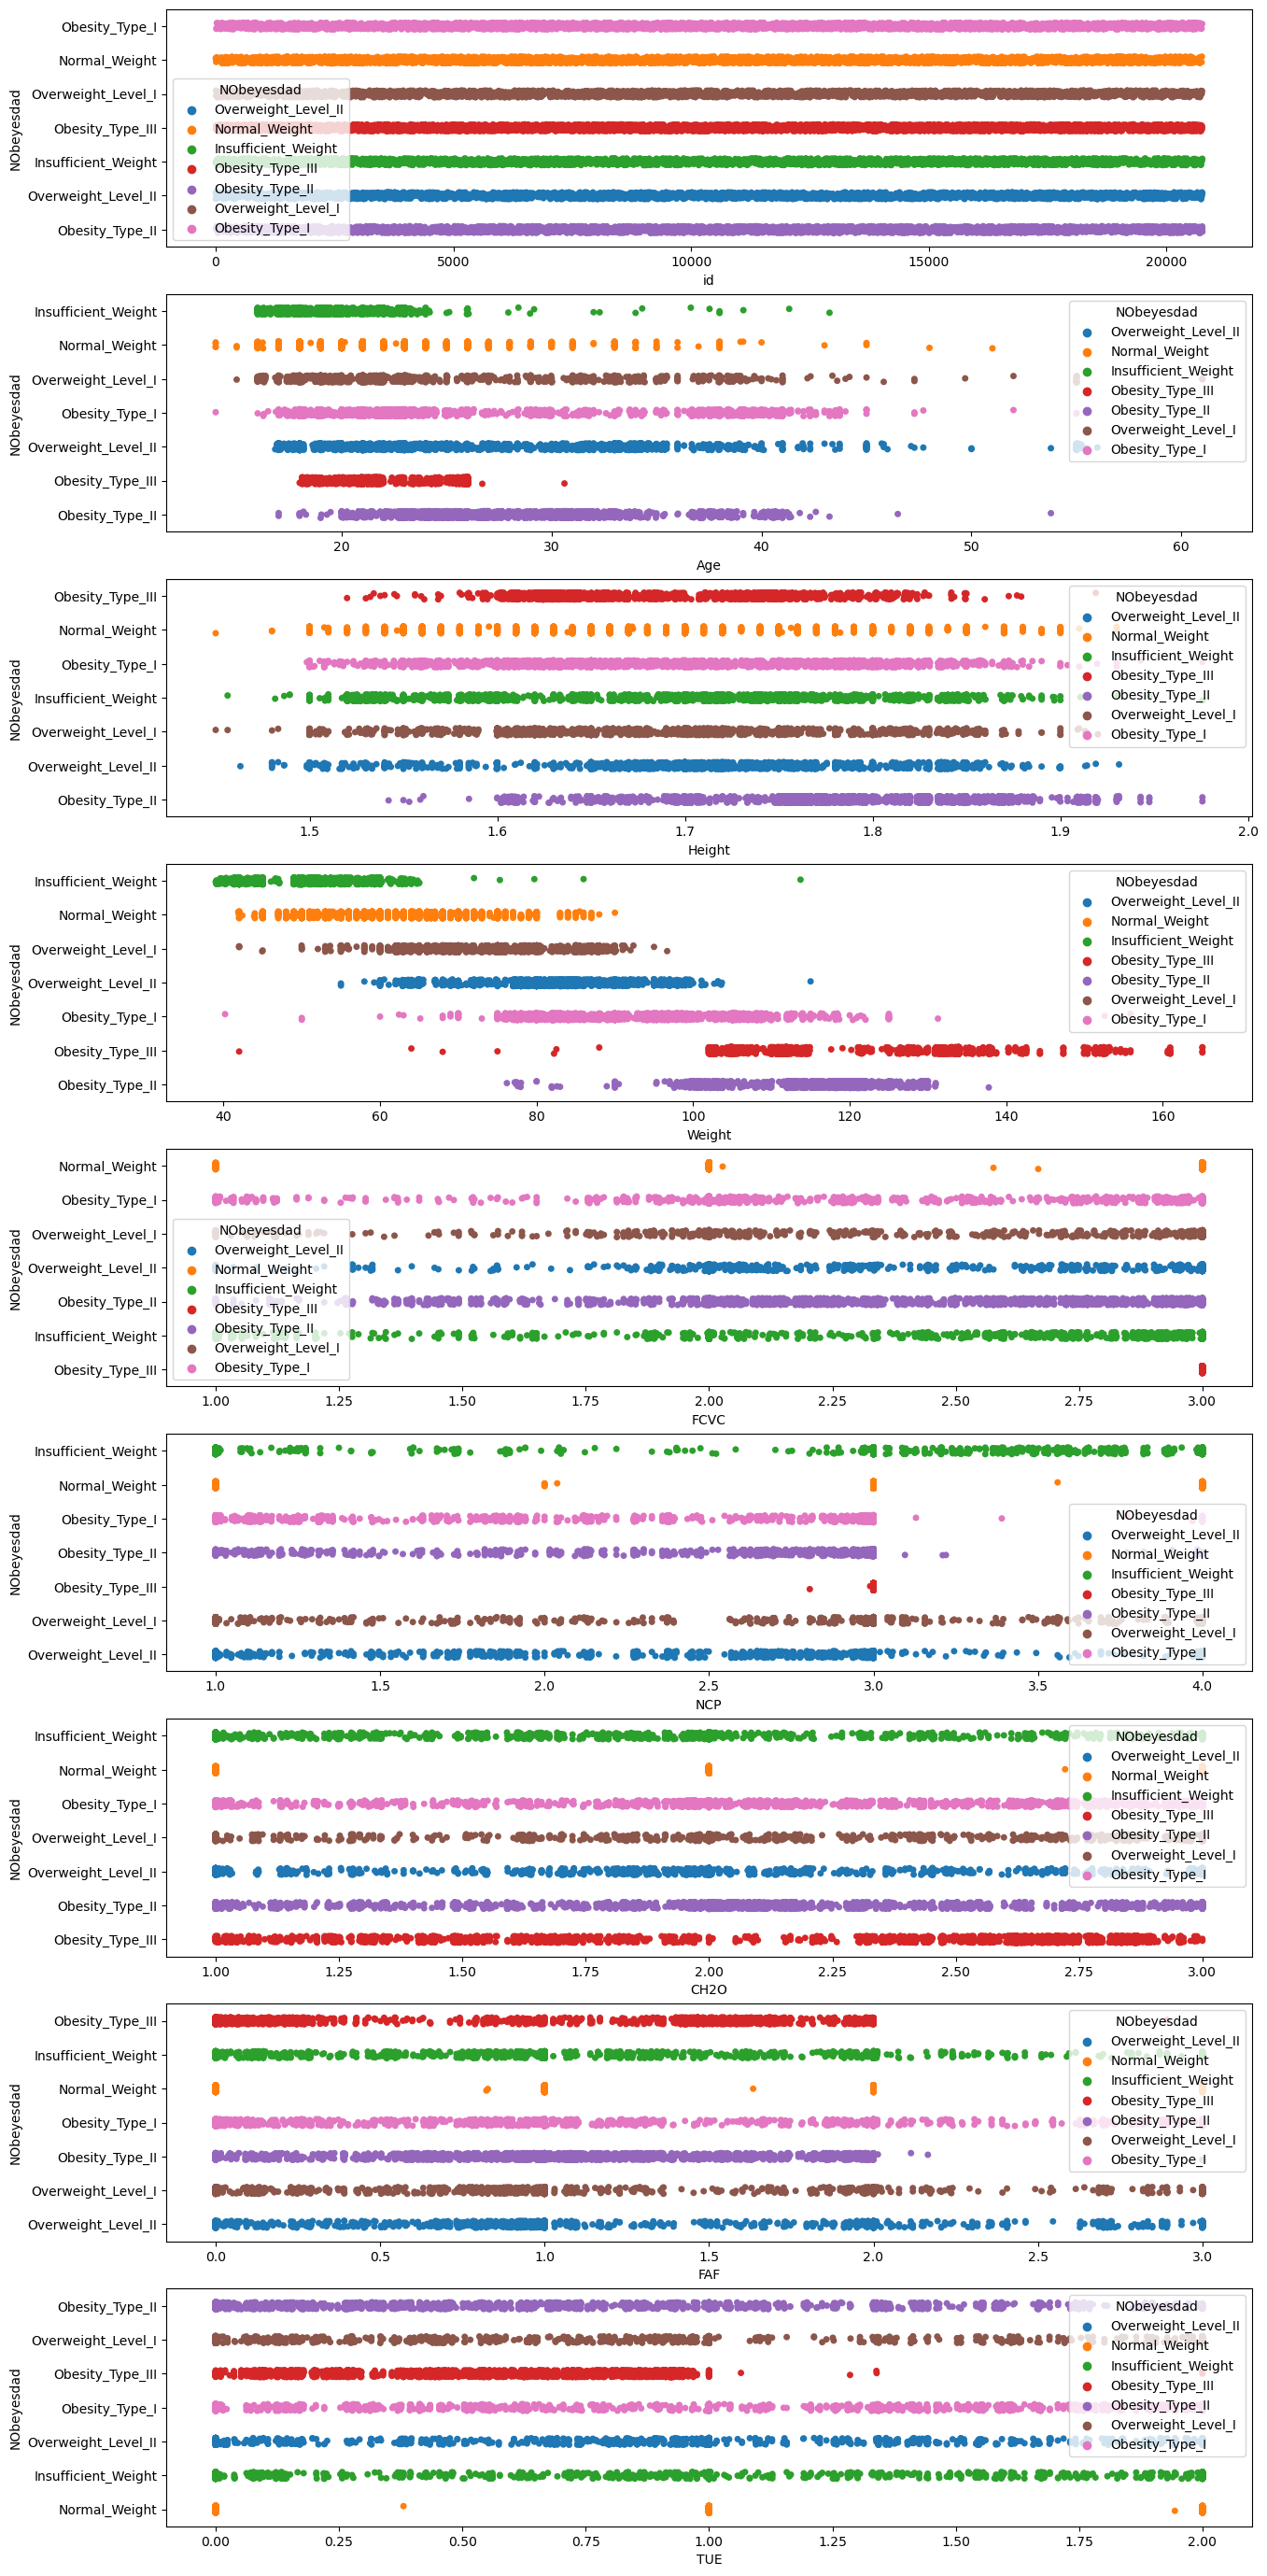

In [23]:
def boxplot_cat_num(var2, data):
    f, axes = plt.subplots(9, 1, figsize=(15, 35))
    temp_df = data

    i=0
    for var in data:
        if obese[var].dtype=="float64" or obese[var].dtype=="int64":
            sort_var = temp_df.groupby([var2])[var].median().sort_values(ascending=True)
            sb.stripplot(data=data, x=var, y=var2, orient='h', ax=axes[i], hue="NObeyesdad", order=sort_var.index)
            i = i+1
boxplot_cat_num("NObeyesdad",obese)

According to the graphs, it seems Weight and Age might be the best to predict NObeyesdad.

In real life, there is another index that is really helpful to determine the risk of an individual to be obese or suffer from CVD. That is the **BMI Index**

This index is calculated by: BMI=Weight/Height^2, where Weight is in kg and Height is in m. This index combines both the effect of weight and height on people's chance to suffer from CVD

We will now add the BMI index into our dataframe, and see its properties as well as its ability to predict NObeyesdad

In [24]:
obese["BMI"]=obese["Weight"]/(obese["Height"]*obese["Height"])
obese

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693


<Axes: >

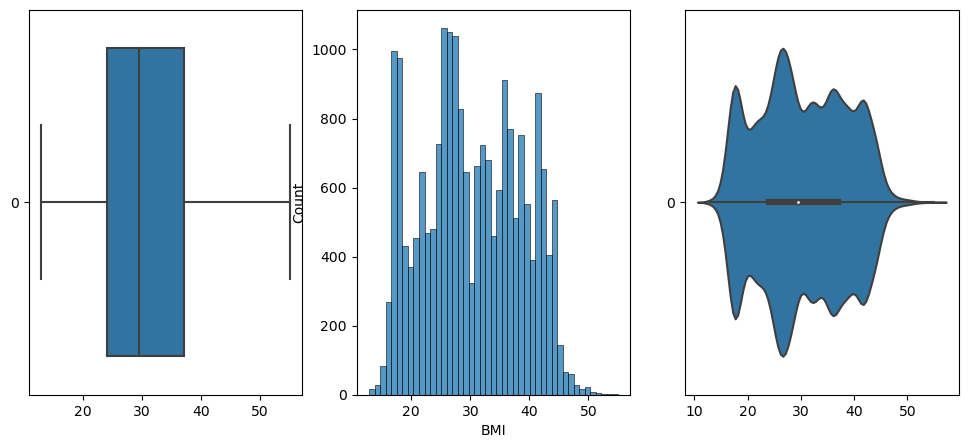

In [25]:
f, axes = plt.subplots(1, 3, figsize=(12, 5))

sb.boxplot(data = obese["BMI"], orient = "h", ax = axes[0])
sb.histplot(data = obese["BMI"], ax = axes[1])
sb.violinplot(data = obese["BMI"], orient = "h", ax = axes[2])

The BMI index looks quite symmetrically distributed the value 26-27. This is good.

<Axes: >

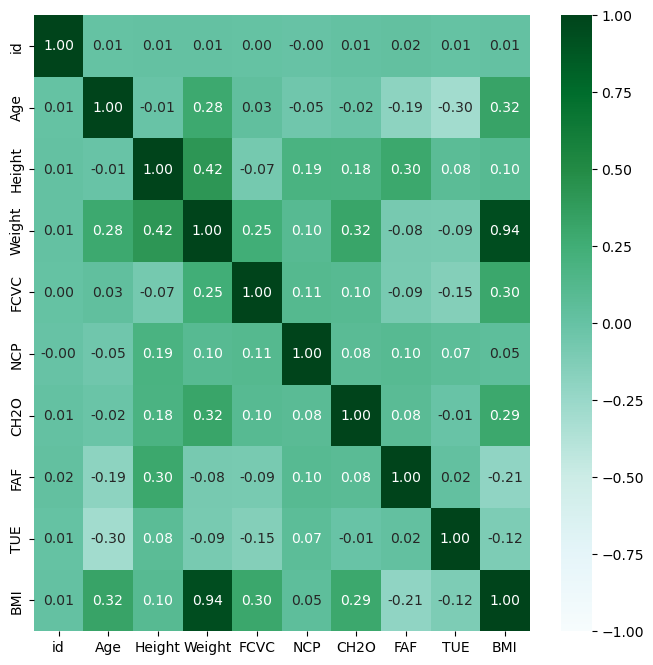

In [26]:
jointDF = obese.select_dtypes(include="number")
jointDF.corr()
f = plt.figure(figsize=(8, 8))
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",cmap="BuGn")

Let's check its stripplot with NObeyesdad

<Axes: xlabel='BMI', ylabel='NObeyesdad'>

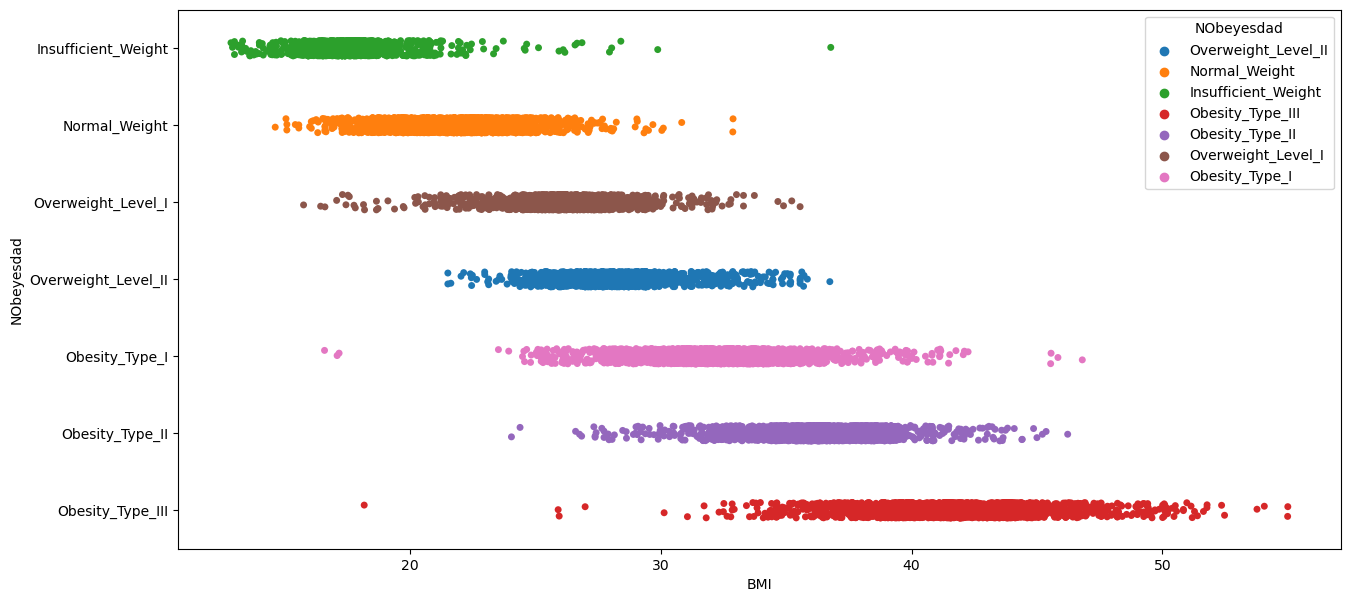

In [27]:
f, axes = plt.subplots(1, 1, figsize=(15, 7))

sort_var = obese.groupby(["NObeyesdad"])["BMI"].median().sort_values(ascending=True)
sb.stripplot(data=obese, x="BMI", y="NObeyesdad", orient='h', ax=axes, hue="NObeyesdad", order=sort_var.index)

It looks like an improvement from Weight and Height when stand alone. This new BMI index looks great for predicting NObeyesdad later on

Let's see the relation of NObeyesdad with BMI and Age, as well as BMI and Gender

<Axes: xlabel='Age', ylabel='BMI'>

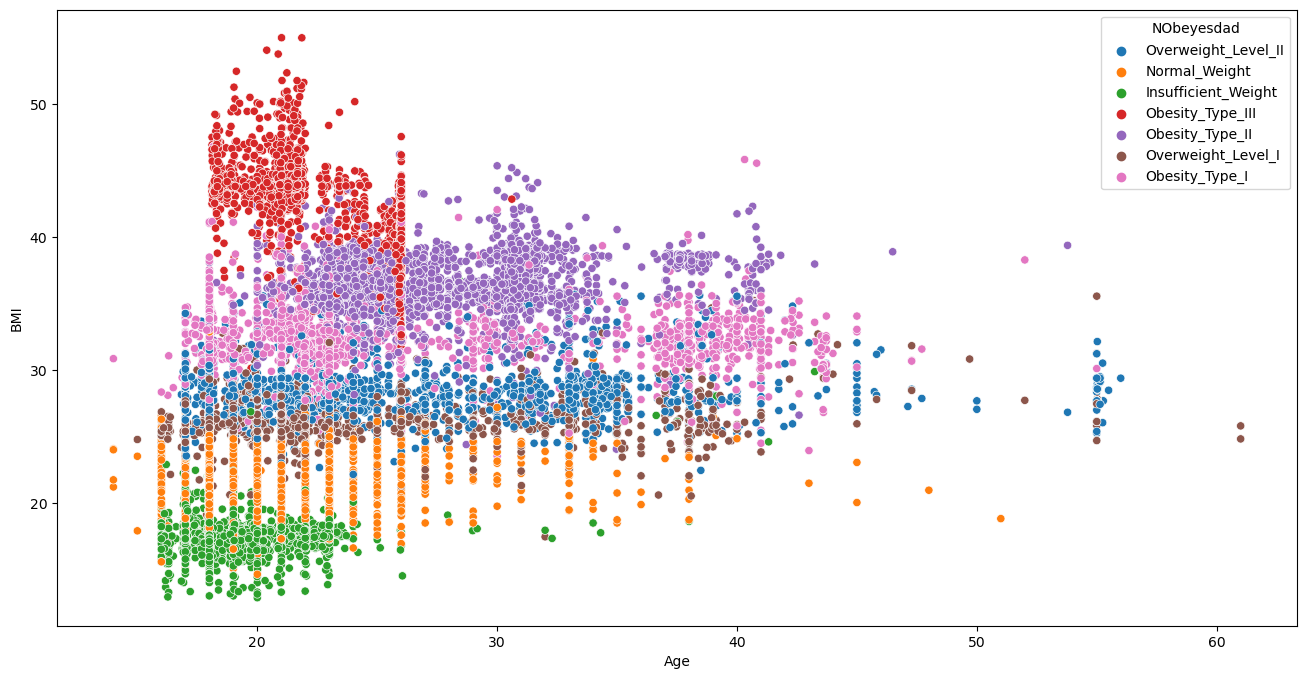

In [28]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'Age', y = 'BMI', hue = 'NObeyesdad', data = obese)

It looks like Obesity level (NObeyesdad) depends a lot on BMI (Can see by different color along the y-axis). For the Age variable, it seems like for young people (around 20 years old), there are both ends of the spectrum (Insufficient weight and Obesity type III), but for older people (People from older than 50 years old), they seem to mostly fall into 3 type: Overweight I and II, and Obesity type I

There is an upward trend which shows that older people tends to have higher BMI. However, this relation is only moderate

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


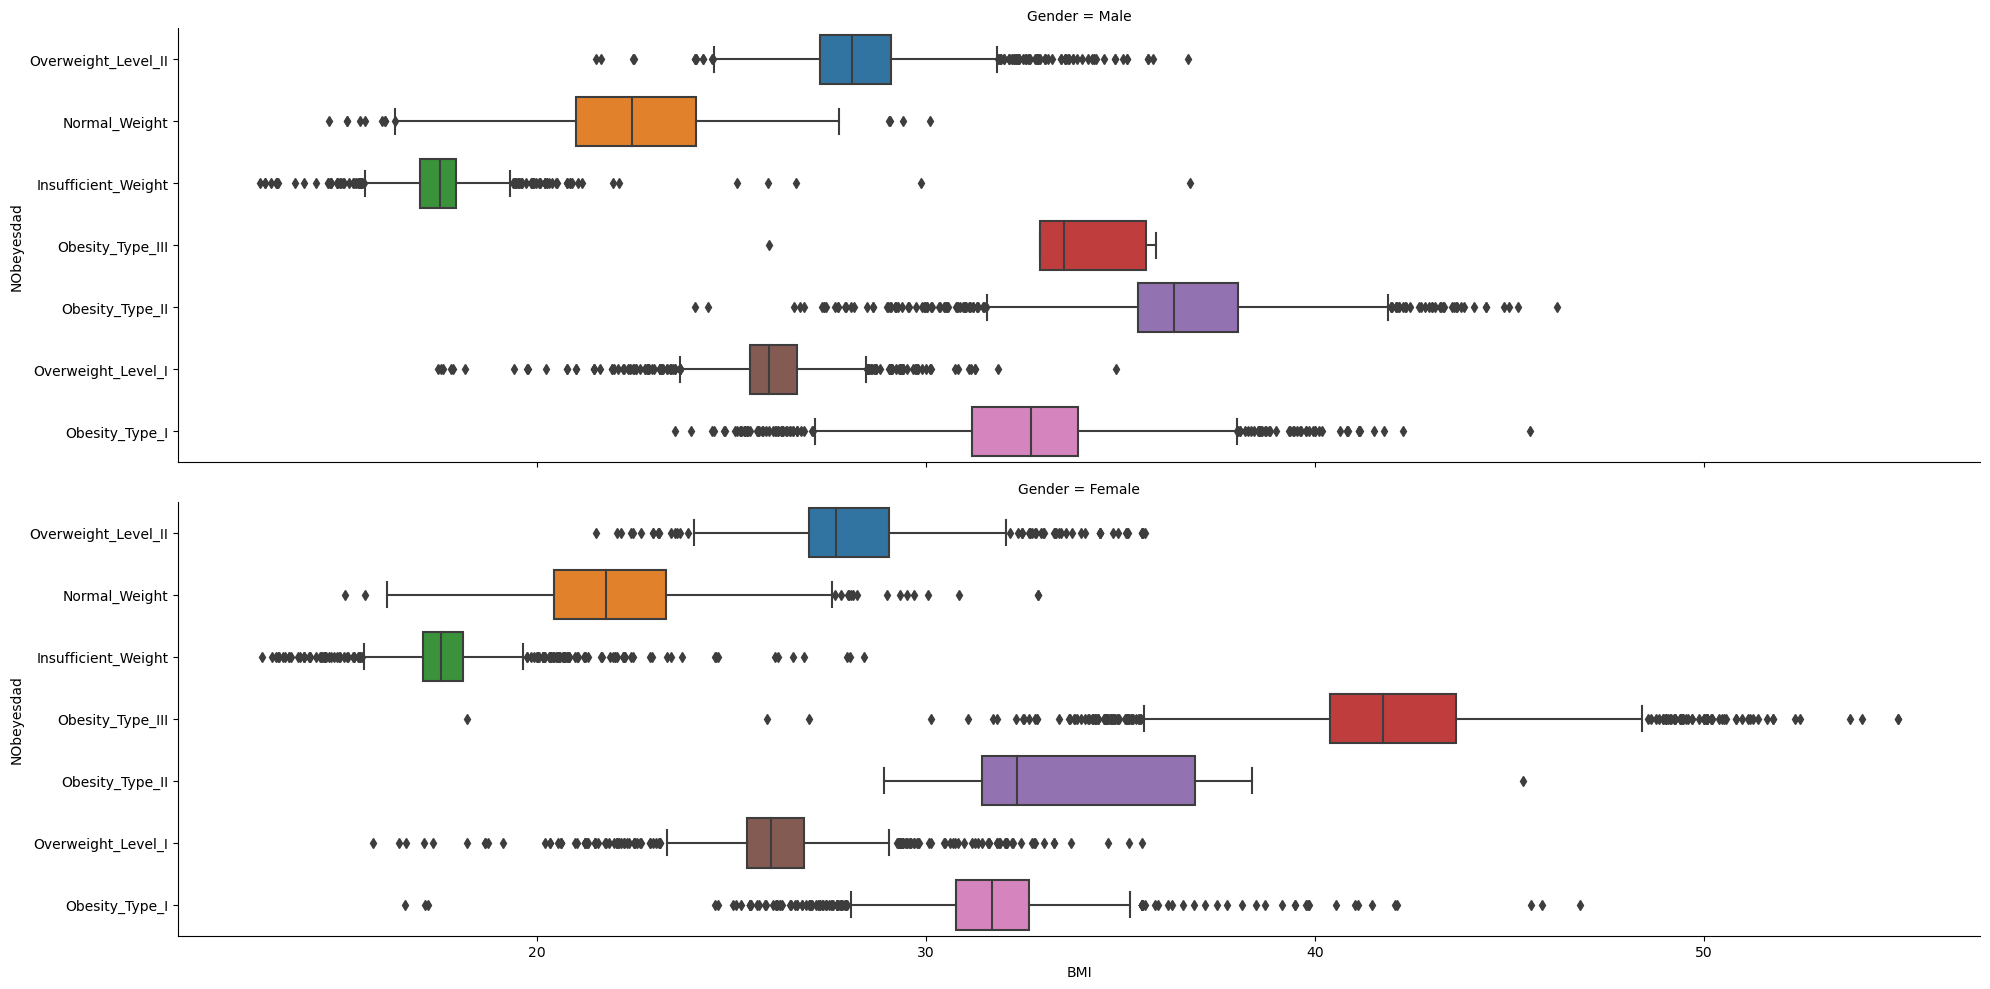

In [29]:
sort_var = obese.groupby(["NObeyesdad"])["BMI"].median().sort_values(ascending=True)
sb.catplot(x = 'BMI', y = 'NObeyesdad', row = 'Gender', data = obese, kind = 'box', aspect = 4)

BMI distribution across NObeyesdad does not change much between Male and Female